# Twitter Sentiment Analysis using Python:
This is a program that fetches tweets from Twitter for the purpose of Sentiment Analysis.

---
---

### Importing the Libraries

In [272]:
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

### Twitter API Credentials

In [273]:
log = pd.read_csv("auth.csv")

consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

---

### Authentication

In [274]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

---

### Creating the API & Creating a Dataframe of Tweets

In [275]:
api = tweepy.API(authenticate, wait_on_rate_limit = True)

---

Get the Top 10 Gaining and Losing Stocks from the <a href="https://www.bseindia.com/markets.html">BSE India</a> Website

In [276]:
name = "TCS"
posts = api.user_timeline(screen_name=name, count=100, lang="en", tweet_mode="extended")
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])
df.head()

Unexpected parameter: lang


,Tweets
0,"We’re flying high, literally. ;)\nDelighted to..."
1,How traditional HR is evolving in the era of t...
2,Here are the top 5 key takeaways from the #TCS...
3,Tune into the next edition of #TCSForum: Thoug...
4,Our leadership share their views on the #TCSQ1...


---

### Cleaning the Tweets

In [277]:
def cleanTweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # Removing the @mentions
    tweet = re.sub(r'#', '', tweet) # Removing the # symbols
    tweet = re.sub(r'RT[\s]+', '', tweet) # Removing RT i.e. ReTweets
    tweet = re.sub(r'https?:\/\/\S+', '', tweet) # Removing Hyperlinks
    return tweet

df['Tweets'] = df['Tweets'].apply(cleanTweet)
df.head()

,Tweets
0,"We’re flying high, literally. ;)\nDelighted to..."
1,How traditional HR is evolving in the era of t...
2,Here are the top 5 key takeaways from the TCSQ...
3,Tune into the next edition of TCSForum: Though...
4,Our leadership share their views on the TCSQ1 ...


---

### Getting Subjectivity and Polarity for Tweets and Assigning them to the Dataframe

In [278]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,"We’re flying high, literally. ;)\nDelighted to...",0.638909,0.349273
1,How traditional HR is evolving in the era of t...,0.425000,0.000000
2,Here are the top 5 key takeaways from the TCSQ...,0.500000,0.166667
3,Tune into the next edition of TCSForum: Though...,0.200000,0.075000
4,Our leadership share their views on the TCSQ1 ...,0.000000,0.000000
...,...,...,...
95,Know more:,0.500000,0.500000
96,"Of the countless stars and planets, the grass ...",0.600000,-0.066667
97,: 🏆🇮🇩 MITCH WINS THE INAUGURAL JAKARTA E-PRIX ...,0.200000,0.300000
98,An opportunity you don't want to miss! Watch J...,0.633333,0.378788


---

### Computing and Performing a Postive, Neutral and Negetive Analysis for the Tweets

In [280]:
def getAnalysis(score):
    if score<0:
        return 'Negetive'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"We’re flying high, literally. ;)\nDelighted to...",0.638909,0.349273,Positive
1,How traditional HR is evolving in the era of t...,0.425000,0.000000,Neutral
2,Here are the top 5 key takeaways from the TCSQ...,0.500000,0.166667,Positive
3,Tune into the next edition of TCSForum: Though...,0.200000,0.075000,Positive
4,Our leadership share their views on the TCSQ1 ...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Know more:,0.500000,0.500000,Positive
96,"Of the countless stars and planets, the grass ...",0.600000,-0.066667,Negetive
97,: 🏆🇮🇩 MITCH WINS THE INAUGURAL JAKARTA E-PRIX ...,0.200000,0.300000,Positive
98,An opportunity you don't want to miss! Watch J...,0.633333,0.378788,Positive


---

### Number of Positive, Neutral and Negetive Tweets

In [295]:
print('Total Tweets:',len(df.index))

Total Tweets: 100


In [288]:
print('Positive Tweets:',len(df.loc[df['Analysis'] == 'Positive']))
print('Neutral Tweets:',len(df.loc[df['Analysis'] == 'Neutral']))
print('Negetive Tweets:',len(df.loc[df['Analysis'] == 'Negetive']))

Positive Tweets: 60
Neutral Tweets: 33
Negetive Tweets: 7


---

### Plotting the Polarity and Subjectivity

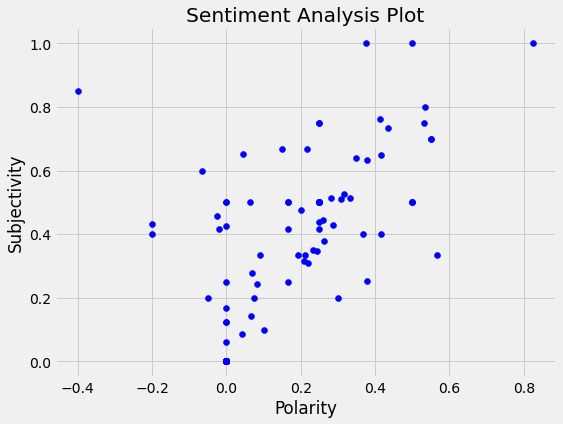

In [281]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

From the above Scatter plot, we can see that majority of the Tweets are Postive since they are all plotted on the right of 0.0 in the graph. We have less number of Tweets which are Negetive i.e. on the left of 0.0 in the graph.

---

### Getting the Number of Positive and Negetive Tweets

In [282]:
ptweets = (df[df.Analysis == 'Positive'])['Tweets']
print('% Positive Tweets =', round((ptweets.shape[0]/df.shape[0])*100, 1))

ntweets = (df[df.Analysis == 'Negetive'])['Tweets']
print('% Negetive Tweets =', round((ntweets.shape[0]/df.shape[0]*100), 1))

% Positive Tweets = 60.0
% Negetive Tweets = 7.0


---

### Plotting a Chart to visualize the Postive, Neutral and Negetive Tweets

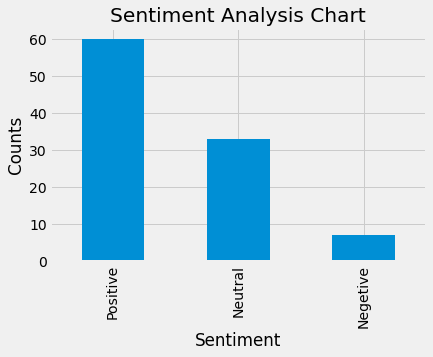

In [283]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis Chart')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()